Build a regression model.

In [18]:
#import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [19]:
#load df into notebook
df = pd.read_csv('../data/final_miami_bikes.csv')

In [20]:
df_drop = df.drop(columns= ['Bike_Station_Coordinates'], axis=1)

In [21]:
df_final = df_drop.drop_duplicates()

In [22]:
#Drop all null values (cannot be used in the analysis)
df_final = df_final.dropna(how='any',axis=0) 

In [23]:
df_final.isna().sum()

Name          0
Locality      0
Popularity    0
Price         0
Rating        0
bikes         0
Place_Type    0
dtype: int64

In [24]:
df_final.shape
#df.shape

(1125, 7)

In [25]:
df_final.head()

,Name,Locality,Popularity,Price,Rating,bikes,Place_Type
0,Bombay Darbar,Miami,0.977682,2.0,9.0,3,Restaurant
1,Jaguar Ceviche Spoon Bar,Miami,0.973000,2.0,8.6,3,Restaurant
2,Le Pain Quotidien,Miami,0.952608,1.0,8.6,3,Café
3,Harry's Pizzeria,Coconut Grove,0.953315,2.0,8.4,3,Restaurant
4,Le Bouchon Du Grove,Coconut Grove,0.942642,3.0,8.5,3,Restaurant


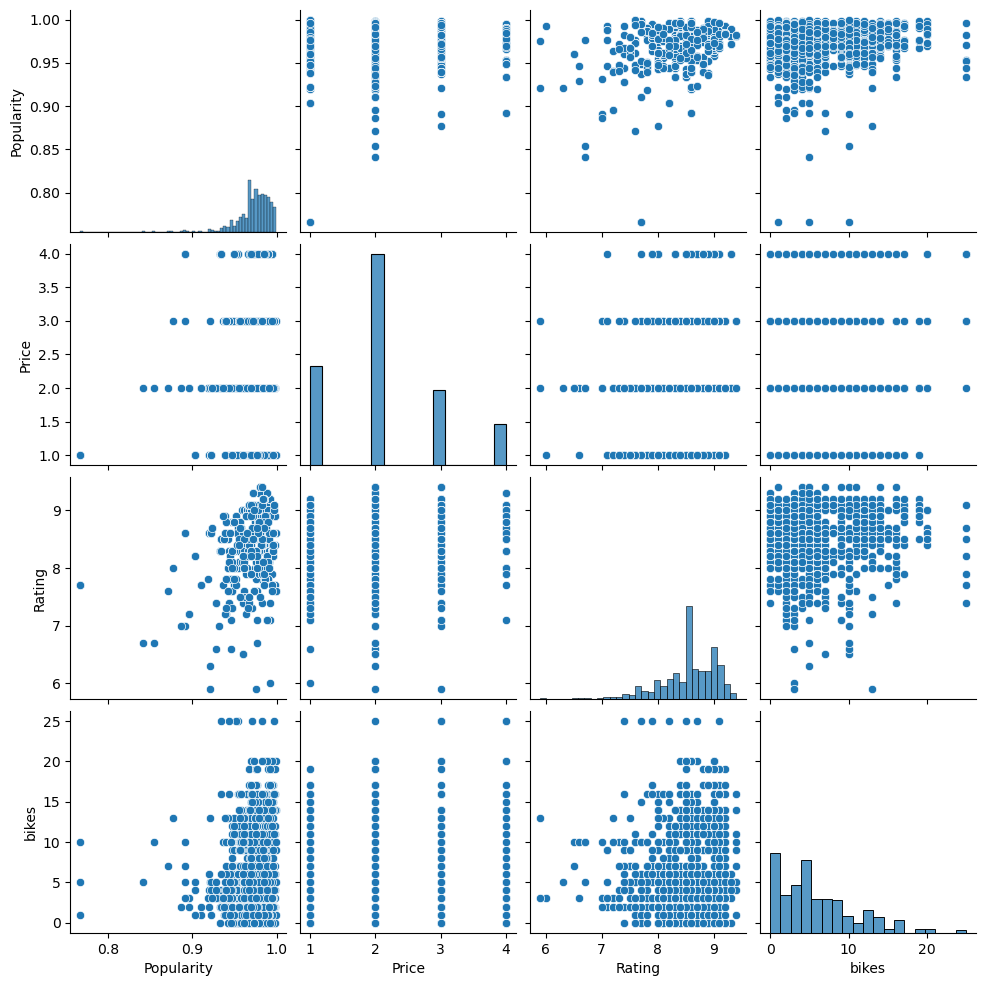

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df_final)
plt.show()

From the pair plot above, does not look like there are any obvious correlations or linearity between the variables. 

In [27]:
#Finding the correlation 
df_final.corr(numeric_only = True)

,Popularity,Price,Rating,bikes
Popularity,1.000000,-0.056550,0.338296,0.042677
Price,-0.056550,1.000000,0.060291,0.031883
Rating,0.338296,0.060291,1.000000,0.020340
bikes,0.042677,0.031883,0.020340,1.000000


In [29]:
#Check the correlations is significant using Pearson's correlation coefficient test

import scipy

stat, p1 = scipy.stats.pearsonr(df_final['Popularity'], df_final['bikes'])
stat, p2 = scipy.stats.pearsonr(df_final['Price'], df_final['bikes'])
stat, p3 = scipy.stats.pearsonr(df_final['Rating'], df_final['bikes'])

print(p1, p2, p3)

0.1525734283858931 0.2853013628501556 0.4955220384511929


Best correlation from Rating and Bikes

In [34]:
#choosing df['Rating'] as the x variable as it seems to have the highest correlation 
y = df_final['bikes']
x = df_final['Rating']
#x = sm.add_constant(x) #add column to include intercept
x.head()  #view constant that was added
y.head()

0    3
1    3
2    3
3    3
4    3
Name: bikes, dtype: int64

In [35]:
#Create the model using x and y 

model = sm.OLS(y,x)
results = model.fit()  #fit the model 

Provide model output and an interpretation of the results. 

In [36]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  bikes   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              1655.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                   3.84e-223
Time:                        22:10:49   Log-Likelihood:                         -3387.1
No. Observations:                1125   AIC:                                      6776.
Df Residuals:                    1124   BIC:                                      6781.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

What does the output tell you?
-R^2 is very low at 0.114 

In [37]:
#create residual plots
residuals = results.resid
residuals

0      -3.269030
1      -2.990406
2      -2.990406
3      -2.851094
4      -2.920750
          ...   
1445   -3.572471
1446   -4.060062
1447   -3.920750
1448   -3.711783
1449   -3.851094
Length: 1125, dtype: float64

<Axes: ylabel='Count'>

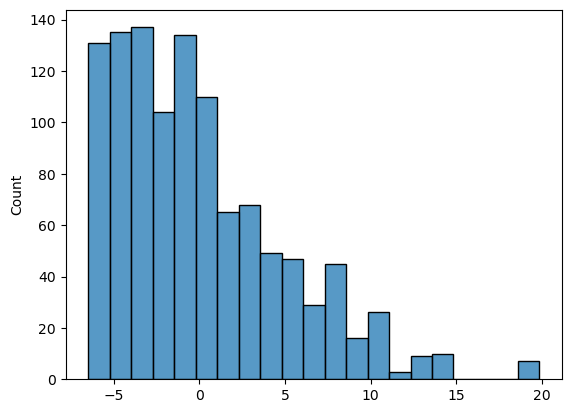

In [38]:
#Check normality
sns.histplot(residuals)

<Axes: xlabel='Rating', ylabel='bikes'>

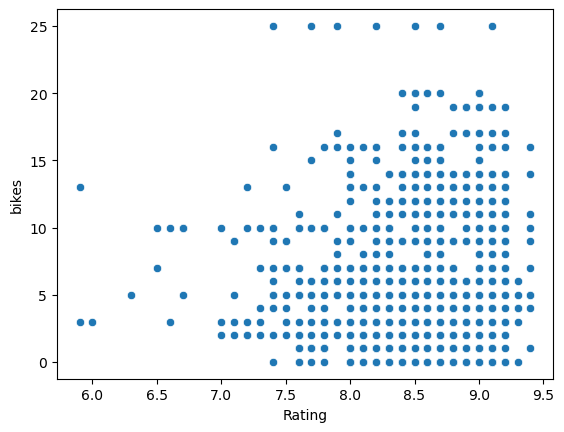

In [48]:
sns.scatterplot(data=df_final, x= 'Rating', y='bikes')

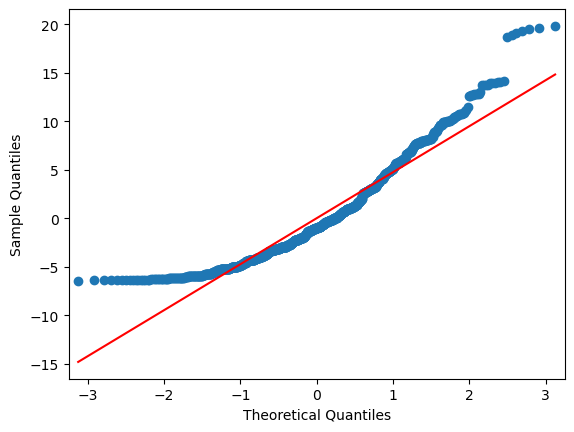

In [41]:
sm.qqplot(residuals, line='r')
plt.show()

In [49]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9209327101707458, pvalue=8.05714366258425e-24)

Shapiro tests highly suggest that the data is normally distributed

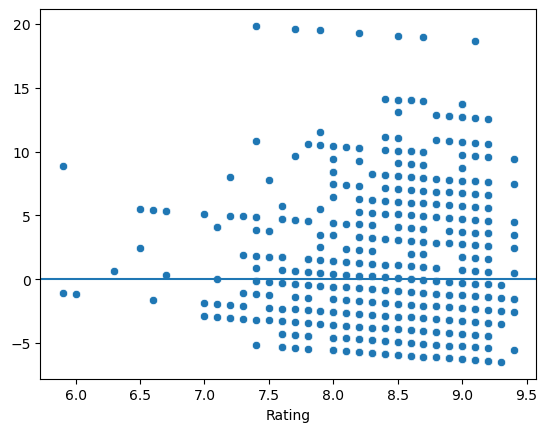

In [50]:
#homoscedasticity

ax= sns.scatterplot(x=df_final['Rating'], y= residuals)
ax.axhline(0)  #create a horizontal line at 0

In [54]:
#convert categorica variable (column= Place_Type) into a dummy variable
df_dummify = pd.concat((
    df_final,
    pd.get_dummies(df_final[['Place_Type','Locality']], drop_first=True)),axis=1)

df_dummify.head()

,Name,Locality,Popularity,Price,Rating,bikes,Place_Type,Place_Type_Bar,Place_Type_Café,Place_Type_Restaurant,Locality_Bay Harbor Islands,Locality_Coconut Grove,Locality_Miami,Locality_Miami Beach,Locality_Miami Financial District,Locality_North Bay Village,Locality_South Beach,Locality_Surfside
0,Bombay Darbar,Miami,0.977682,2.0,9.0,3,Restaurant,0,0,1,0,0,1,0,0,0,0,0
1,Jaguar Ceviche Spoon Bar,Miami,0.973000,2.0,8.6,3,Restaurant,0,0,1,0,0,1,0,0,0,0,0
2,Le Pain Quotidien,Miami,0.952608,1.0,8.6,3,Café,0,1,0,0,0,1,0,0,0,0,0
3,Harry's Pizzeria,Coconut Grove,0.953315,2.0,8.4,3,Restaurant,0,0,1,0,1,0,0,0,0,0,0
4,Le Bouchon Du Grove,Coconut Grove,0.942642,3.0,8.5,3,Restaurant,0,0,1,0,1,0,0,0,0,0,0


In [58]:
y = df_dummify['bikes']
x = df_dummify[['Rating', 
                'Price', 
                'Popularity',
                'Place_Type_Bar','Place_Type_Café','Place_Type_Restaurant',
                'Locality_Bay Harbor Islands','Locality_Coconut Grove',
                'Locality_Miami','Locality_Miami Beach',
                'Locality_Miami Financial District',
                'Locality_North Bay Village', 'Locality_South Beach', 
                'Locality_Surfside']]
#x = sm.add_constant(x) #add column to include intercept
x.head()  #view constant that was added

,Rating,Price,Popularity,Place_Type_Bar,Place_Type_Café,Place_Type_Restaurant,Locality_Bay Harbor Islands,Locality_Coconut Grove,Locality_Miami,Locality_Miami Beach,Locality_Miami Financial District,Locality_North Bay Village,Locality_South Beach,Locality_Surfside
0,9.0,2.0,0.977682,0,0,1,0,0,1,0,0,0,0,0
1,8.6,2.0,0.973000,0,0,1,0,0,1,0,0,0,0,0
2,8.6,1.0,0.952608,0,1,0,0,0,1,0,0,0,0,0
3,8.4,2.0,0.953315,0,0,1,0,1,0,0,0,0,0,0
4,8.5,3.0,0.942642,0,0,1,0,1,0,0,0,0,0,0


In [59]:
model = sm.OLS(y,x)
results = model.fit()  #fit the model 
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  bikes   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              162.4
Date:                Fri, 01 Sep 2023   Prob (F-statistic):                   7.19e-257
Time:                        22:19:00   Log-Likelihood:                         -3269.6
No. Observations:                1125   AIC:                                      6567.
Df Residuals:                    1111   BIC:                                      6638.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [60]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals, results.model.exog)
print(p, f_p)

2.1937972267959457e-63 4.1731933196009376e-75


Data is not normally distributed. Performed goodness of fit test, is heteroscedestic. Does not appear to be a linear regression.

In [ ]:
#Create the model predictor here:
y = (0.0153-0.0023 (x) + 0.8548 

results.params #pulls model params

b= results.params['const']
m- results.params['']

In [ ]:
#Test cases using model predictor

known_ = 
predicted_ = m*known_ + b
new_X = pd.Dataframe({'const' : [1]*100,
                     'X' : np.linspace(start=0, stop=100, num=100)})
predictions - results.predict(new_X, transform = True)

In [ ]:
#Create a scatter with actual data
plot.scatter(X[''], y, label ='Actual Data')

In [ ]:
#Create a scatter with predicted values
plot.scatter(new_X[''], predictions, color= red, label ='Model Prediction')

#Add labels and legend
plot.xlabel('')
plot.ylabel('')
plot.legend()
plot.title('')
plot.show

# Stretch

How can you turn the regression model into a classification model?

In [ ]:
#Make the response variable into discrete categories to convert it to categorical variable
#Bin the response variable, "number of free bikes" into intervals
#Give the intervals a "label", example: "low traffic, medium traffic, high traffic"